A Generative Adversarial Net or GAN, is a deep learning architecture for creating generator models.

A generator model is capable of generating new artificial samples that are good enough to have come from an existing distribution of samples.

GANs are comprised of both generator and discriminator models. The generator is responsible for generating new samples from the domain, and the discriminator is responsible for classifying whether samples are real or fake (generated). Importantly, the performance of the discriminator model is used to update both the model weights of the discriminator itself and the generator model. This means that the generator never actually sees examples from the domain and is adapted based on how well the discriminator performs.

The objective of this notebook is to present the pratical intuition behind GANs and to showcase the unique idea they are based on.

In [1]:
import numpy as np
from keras import models
from keras import layers
import matplotlib.pyplot as plt
%matplotlib inline

We first define a function to build a **real** dataset, i.e. the existing distribution of samples that our generator will try to mimic.
Here, we are making a quadratic (x^2) distribution and labelling our values with '1'.

In [3]:
#real data samples

def make_real(n):
    
    data = np.zeros((n,2))
    
    x1 = np.random.uniform(-1,1,n)
    x2 = x1*x1
    
    data = np.stack((x1, x2), axis=-1)  #column-wise stack
    
    labels = np.ones((n,1))
        
    return data, labels

In [4]:
#calling the make_real function which output the distribution values and the labels

real_data, real_labels = make_real(100)

<function matplotlib.pyplot.show(close=None, block=None)>

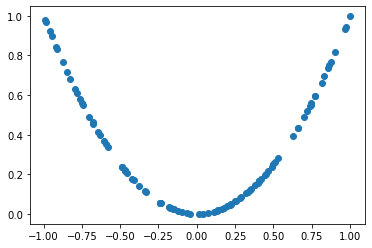

In [5]:
plt.scatter(real_data[:,0], real_data[:,1])
plt.show

Next we define a function to generate noise or garbage data, which will also be an input to our generator. In essence, the generator will create plausible values out of garbage.
We sample random float values between the same scale (-1,1).

In [ ]:
#generating fake/noisy data

def make_fake(n):
    
    data = np.zeros((n,2))
    
    x1 = np.random.uniform(-1,1,n)
    x2 = np.random.uniform(-1,1,n)
    
    data = np.stack((x1, x2), axis=-1)
    
    labels = np.zeros((n,1))
    
    return data, labels

In [7]:
fake_data, fake_labels = make_fake(100)

<function matplotlib.pyplot.show(close=None, block=None)>

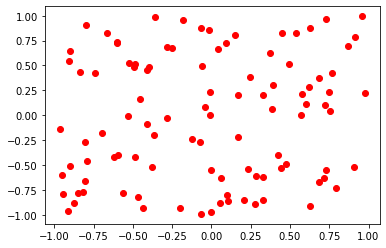

In [8]:
plt.scatter(fake_data[:,0], fake_data[:,1], color='red')
plt.show

We define a function for our discriminator first, because the generator is trained on the discriminator error. The discriminator will be a simple sequential model as our target function isn't too complicated. It will learn to distinguish between real and fake data samples from our respective distributions.

In [9]:
#discriminator
def discriminator():
    
    model = models.Sequential()
    
    model.add(layers.Dense(16, activation='relu', kernel_initializer='random_uniform', input_shape=(2,)))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

We train the discriminator on real samples and fake samples and then evaluate it on the same values, printing its accuracy in predicting the real and fake distribtution values.

In [10]:
def train_discriminator(model, epochs):
    
    for i in range(epochs):
        
        real_data, real_labels = make_real(100)
        model.train_on_batch(real_data, real_labels)
        
        fake_data, fake_labels = make_fake(100)
        model.train_on_batch(fake_data, fake_labels)
        
        loss_real, acc_real = model.evaluate(real_data, real_labels, verbose=0)
        loss_fake, acc_fake = model.evaluate(fake_data, fake_labels, verbose=0)
        
        #printing the epoch number, real accuracy and fake accuracy respectively
        print(i, acc_real, acc_fake)

In [11]:
#calling the discriminator function
model_discriminator = discriminator()
model_discriminator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                48        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 625
Trainable params: 625
Non-trainable params: 0
_________________________________________________________________


In [12]:
#training the discriminator
train_discriminator(model_discriminator, 1000)

0 0.800000011920929 0.30000001192092896
1 0.9100000262260437 0.3100000023841858
2 1.0 0.3100000023841858
3 1.0 0.4000000059604645
4 1.0 0.44999998807907104
5 1.0 0.4099999964237213
6 1.0 0.3799999952316284
7 1.0 0.47999998927116394
8 1.0 0.4399999976158142
9 1.0 0.5799999833106995
10 1.0 0.46000000834465027
11 1.0 0.6399999856948853
12 1.0 0.5799999833106995
13 1.0 0.49000000953674316
14 1.0 0.44999998807907104
15 1.0 0.4699999988079071
16 1.0 0.49000000953674316
17 1.0 0.550000011920929
18 1.0 0.5
19 1.0 0.44999998807907104
20 1.0 0.5400000214576721
21 1.0 0.5099999904632568
22 1.0 0.49000000953674316
23 1.0 0.46000000834465027
24 1.0 0.41999998688697815
25 1.0 0.5299999713897705
26 1.0 0.5099999904632568
27 1.0 0.5099999904632568
28 1.0 0.5099999904632568
29 1.0 0.5299999713897705
30 1.0 0.5799999833106995
31 1.0 0.5899999737739563
32 1.0 0.5
33 1.0 0.5
34 1.0 0.44999998807907104
35 1.0 0.5400000214576721
36 1.0 0.6499999761581421
37 1.0 0.49000000953674316
38 1.0 0.41999998688697815

The generator is almost similar to the discriminator. But we do not compile it here because it has to fit over the discriminator first.

In [13]:
#generator
def generator():
    
    model = models.Sequential()
    
    model.add(layers.Dense(16, activation='relu', kernel_initializer='random_uniform', input_shape=(2,)))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(2, activation='linear'))
    
    return model

In [14]:
#generator output i.e. fake samples to be fed to the discriminator

model_generator = generator()
gen_ouput = model_generator.predict(fake_data)

The generator output will be complete rubbish, as expected, since it hasn't been trained yet.

<function matplotlib.pyplot.show(close=None, block=None)>

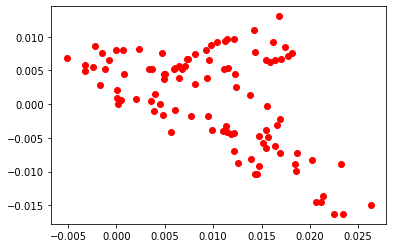

In [15]:
plt.scatter(gen_ouput[:,0], gen_ouput[:,1], color='red')
plt.show

Here we combine the generator and discriminator, with the former being over the latter, sequentially, and then compile it.
The discriminator is dependent only on the real and fake values, hence, we can train it separately. However, we need to train the generator as it dependent on the discriminator's output, by keeping the discriminator weights frozen (untrainable), to avoid overtraining it.
You can choose to train the discriminator and generator simultaneously, here itself. But to make our code a bit more modular, we train the discriminator separately, and combine it, pretrained, here.

In [16]:
#The GAN model, finally...

def gan(generator, discriminator):
    
    #freeze discriminator training
    discriminator.trainable = False
    
    model = models.Sequential()
    
    #order is important here
    model.add(generator)
    model.add(discriminator)
    
    model.compile(optimizer='adam', loss='binary_crossentropy')
    
    return model     #don't forget this :)

In [17]:
model_gan = gan(model_generator, model_discriminator)
model_gan.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 2)                 658       
_________________________________________________________________
sequential (Sequential)      (None, 1)                 625       
Total params: 1,283
Trainable params: 658
Non-trainable params: 625
_________________________________________________________________


Here we define a function to train our GAN model. Note that we are redefining our fake labels as '1' instead of '0'. This is a neat trick when implementing GANs.
The reason for the redefinition is that we want our generator to capitalize on the discriminator's loss, i.e. we want our generator to update its weights when the discriminator successfully identifies the fake samples. Our generator's success is when the discriminator is fooled, hence the "Adversarial" in Generative Adversarial Nets.
By supplying the "fake labels" as 1 instead of 0, we encourage a significant loss for our generator when the discirminator successfully identifies the generated values as fake, i.e. 0. The loss function should see this as a success but since we passed the accompanying labels as 1, it passes a loss to the generator.

In [18]:
def train_gan(model, epochs, samples):
    
    fake_data, fake_labels = make_fake(samples)
    
    #the trick
    fake_labels = np.ones((samples, 1))
    
    model.train_on_batch(fake_data, fake_labels)

Let us assemble our discriminator training (separate) under this function.

In [19]:
def train_gan(g_model, d_model, gan_model, epochs, samples):
    
    for i in range(epochs):
        
        real_data, real_labels = make_real(samples)
        fake_data, fake_labels = make_fake(samples)

        #to be fed to the discriminator
        fake_data = g_model.predict(fake_data)

        d_model.train_on_batch(real_data, real_labels)
        d_model.train_on_batch(fake_data, fake_labels)

        #make a fresh input batch for the generator
        temp_fake_data, temp_labels = make_fake(samples)

        gan_sample_input = temp_fake_data
        gan_sample_labels = np.ones((samples,1))

        gan_model.train_on_batch(gan_sample_input, gan_sample_labels)

Since, this models relies on a dynamic equilibrium between the generator (trying to fool) and the discriminator (trying to separate real and fake), we cannot mathematically declare a threshold to end the training of our model. We can however, evaluate our model's performance or visually inspect it after regualer intervals to figure out when we should stop.
Here we define a function to guage our model's performance by periodically printing the discriminator's accuracy and the plots of generated and real distribution values.

In [20]:
#evaluate performance
def gan_performance(epoch, g_model, d_model, samples):
    
    real_data, real_labels = make_real(samples)
    fake_data, fake_labels = make_fake(samples)

    fake_data = g_model.predict(fake_data)
    
    #discirminator accuracy
    loss_real, acc_real = d_model.evaluate(real_data, real_labels, verbose=0)
    loss_fake, acc_fake = d_model.evaluate(fake_data, fake_labels, verbose=0)
    
    print(epoch, acc_real, acc_fake)
    
    #superimposed plot of real and generated values
    plt.scatter(real_data[:,0], real_data[:,1], color='blue')
    plt.scatter(fake_data[:,0], fake_data[:,1], color='red')
    plt.show()

Combine everything into one function.

In [21]:
def train_gan(g_model, d_model, gan_model, epochs, samples, checkpoint):
    
    for i in range(epochs):
        
        real_data, real_labels = make_real(samples)
        fake_data, fake_labels = make_fake(samples)

        fake_data = g_model.predict(fake_data)

        d_model.train_on_batch(real_data, real_labels)
        d_model.train_on_batch(fake_data, fake_labels)

        temp_fake_data, temp_labels = make_fake(samples)

        gan_sample_input = temp_fake_data
        gan_sample_labels = np.ones((samples,1))

        gan_model.train_on_batch(gan_sample_input, gan_sample_labels)
        
        #initial plot to show discripancy
        if(i==10):
            gan_performance(i, g_model, d_model, 100)
            
        #plot after every "checkpoint" number of epochs
        if( (i+1) % checkpoint == 0):
            gan_performance(i, g_model, d_model, 100)

The intial plot will show a huge difference between our generator and real distribution. But as the training progresses, our generator distribution starts to take the real distribution's shape.

10 0.699999988079071 0.07000000029802322


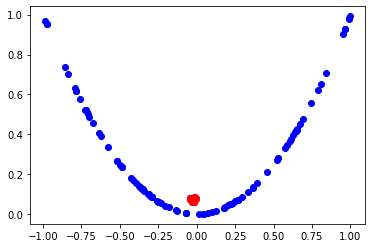

599 0.6499999761581421 0.6700000166893005


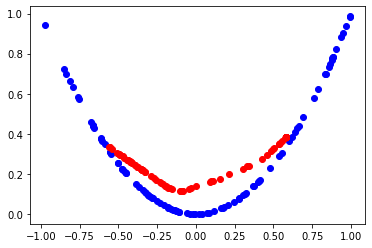

1199 0.5799999833106995 0.41999998688697815


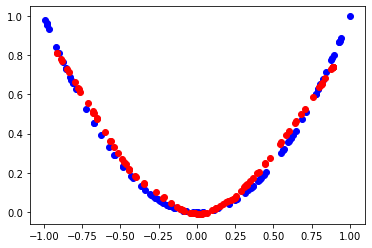

1799 0.5299999713897705 0.46000000834465027


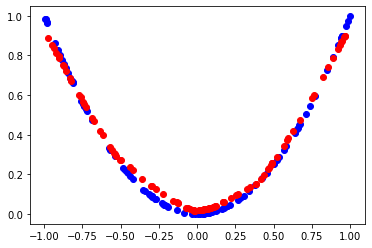

2399 0.5699999928474426 0.550000011920929


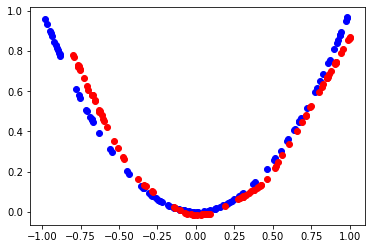

2999 0.6600000262260437 0.3100000023841858


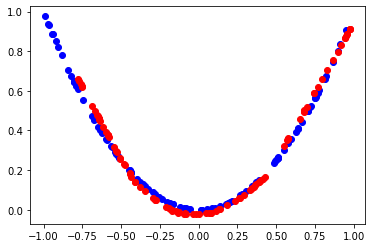

In [22]:
train_gan(model_generator, model_discriminator, model_gan, 3000, 100, 600)

*~ Author: Paritosh Tiwari*

*~ Thanks to Uday Prajapati for helping me debug some issues.*